In [1]:
from pydub import AudioSegment
from pydub.utils import get_array_type
import os
import array
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
from PIL import Image


In [ ]:
sound = AudioSegment.from_mp3('voyager.mp3')
left = sound.split_to_mono()[0]
bit_depth = left.sample_width * 8
array_type = get_array_type(bit_depth)

numeric_array = array.array(array_type, left._data)
data = numeric_array

In [2]:
wav_fname = "D:\\Git\\Voyager_Golden_Record\\mono_left.wav"
#spio.wavfile.read(wav_fname)
samplerate, data = spio.wavfile.read(wav_fname)
length = data.shape[0] / samplerate
print(f"length = {length}s")
time = np.linspace(0., length, data.shape[0])
#plt.plot(time, data[:], label="Left channel")
#plt.xlabel("Time [s]")
#plt.ylabel("Amplitude")
#plt.show()

length = 947.7119954648526s


start at 30.052154195011337, end at 30.102040816326532  
start at 30.102040816326532, end at 30.151927437641724  
start at 30.151927437641724, end at 30.201814058956916  
start at 30.201814058956916, end at 30.25170068027211  
start at 30.25170068027211, end at 30.3015873015873  
start at 30.3015873015873, end at 30.351473922902493  
start at 30.351473922902493, end at 30.401360544217688  
start at 30.401360544217688, end at 30.45124716553288  
start at 30.45124716553288, end at 30.501133786848072  
start at 30.501133786848072, end at 30.551020408163264  
start at 30.551020408163264, end at 30.600907029478456  
start at 30.600907029478456, end at 30.650793650793652  
start at 30.650793650793652, end at 30.700680272108844  
start at 30.700680272108844, end at 30.750566893424036  
start at 30.750566893424036, end at 30.800453514739228  
start at 30.800453514739228, end at 30.85034013605442  
start at 30.85034013605442, end at 30.900226757369616  
start at 30.900226757369616, end at 30.95

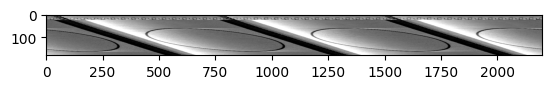

In [3]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2200
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
adjust_offset = 0
offset = samplerate*30 +2300 
for index in range(180):
    window = data[offset+index*window_size:offset+(index+1)*window_size]
    print(f"start at {(offset+index*window_size)/samplerate}, end at {(offset+(index+1)*window_size)/samplerate}  ")
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    x = np.clip(x,-2500,2500)
    image_data.append(-0.5*x[1:window_size])
plt.imshow(image_data,cmap="gray")
plt.show()

start at 30.052154195011337, end at 30.102040816326532  
start at 30.102040816326532, end at 30.151927437641724  
start at 30.151927437641724, end at 30.201814058956916  
start at 30.201814058956916, end at 30.25170068027211  
start at 30.25170068027211, end at 30.3015873015873  
start at 30.3015873015873, end at 30.351473922902493  
start at 30.351473922902493, end at 30.401360544217688  
start at 30.401360544217688, end at 30.45124716553288  
start at 30.45124716553288, end at 30.501133786848072  
start at 30.501133786848072, end at 30.551020408163264  
start at 30.551020408163264, end at 30.600907029478456  
start at 30.600907029478456, end at 30.650793650793652  
start at 30.650793650793652, end at 30.700680272108844  
start at 30.700680272108844, end at 30.750566893424036  
start at 30.750566893424036, end at 30.800453514739228  
start at 30.800453514739228, end at 30.85034013605442  
start at 30.85034013605442, end at 30.900226757369616  
start at 30.900226757369616, end at 30.95

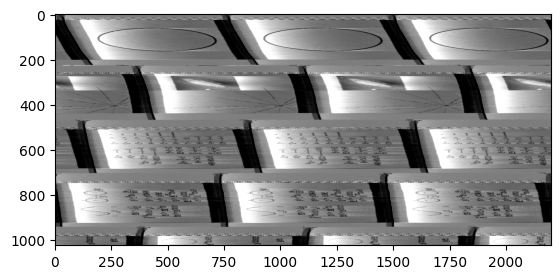

In [61]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2200
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
adjust_offset = window_size/(3.8*220)
offset = samplerate*30 +2300 
for index in range(1024):
    window = data[offset+index*window_size + int(adjust_offset*index):offset+(index+1)*window_size + int(adjust_offset*index)]
    print(f"start at {(offset+index*window_size)/samplerate}, end at {(offset+(index+1)*window_size)/samplerate}  ")
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    x = np.clip(x,-2500,2500)
    image_data.append(-0.5*x[0:window_size])
plt.imshow(image_data,cmap="gray")
plt.show()

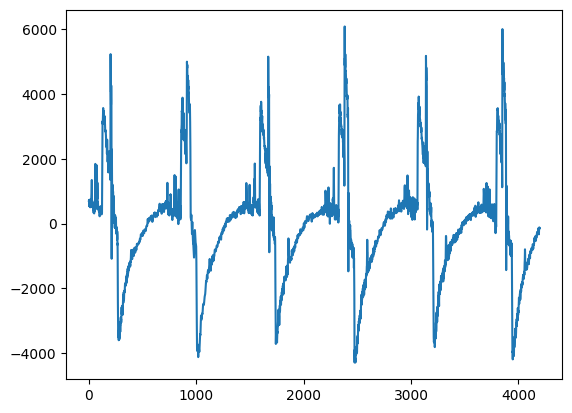

In [83]:
#plot signal at noise marker
offset = samplerate*30 +2300 

index = 210
window = data[offset+index*window_size + int(adjust_offset*index):offset+(index+1)*window_size + int(adjust_offset*index)]
plt.plot(range(len(window)), window[:], label="Left channel")


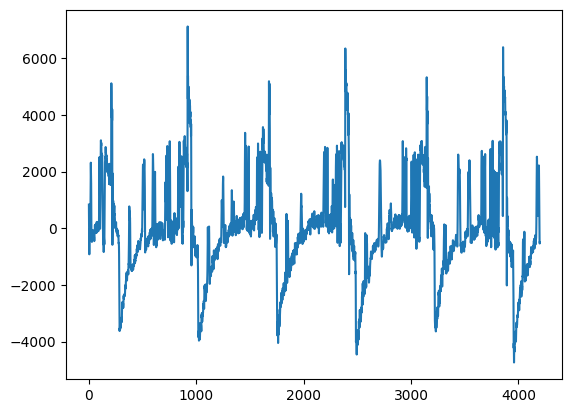

In [87]:
#plot signal at data marker
index = 600
window = data[offset+index*window_size + int(adjust_offset*index):offset+(index+1)*window_size + int(adjust_offset*index)]
plt.plot(range(len(window)), window[:], label="Left channel")


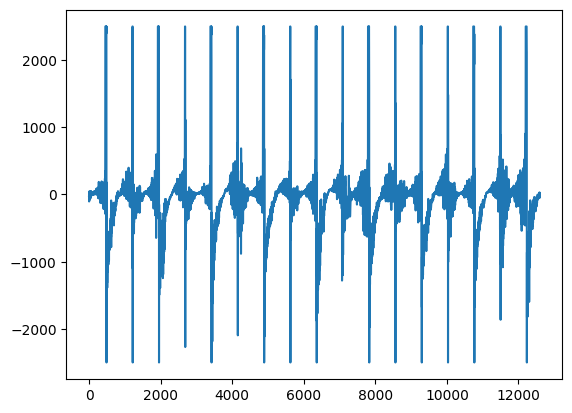

In [80]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 10000
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
adjust_offset = 0
offset = samplerate*182 +2300 
# for index in range(180):
#     window = data[offset+index*window_size:offset+(index+1)*window_size]
#     window = np.clip(window,-2500,2500)
#     plt.plot(range(len(window)), window[:], label="Left channel")
#     print(f"start at {(offset+index*window_size)/samplerate}, end at {(offset+(index+1)*window_size)/samplerate}  ")
#     b, a = butter(3, Wn, 'highpass',analog='false')
#     x = filtfilt(b, a, window)
#     x = np.clip(x,-2500,2500)
#     image_data.append(-0.5*x[1:window_size])
# #plt.imshow(image_data,cmap="gray")
# #plt.show()
window_size = 4200
window = data[offset+0*window_size:offset+(0+3)*window_size]
window = np.clip(window,-2500,2500)

window1 = window[0*window_size:(0+1)*window_size]
window2 = window[1*window_size:(1+1)*window_size]
window3 = window[2*window_size:(2+1)*window_size]

# super_threshold_indices = window1 > 500
# window1[super_threshold_indices] = 0
# super_threshold_indices = window1 <- 1500
# window1[super_threshold_indices] = 0

#w1_max_value=  np.max(window1)
#w1_max = np.argmax(window1)
#window1 = window1[0:w1_max
plt.plot(range(len(window)), window[:], label="Left channel")
#plt.plot(range(len(window1)), window1[:], label="Left channel")
#plt.plot(range(len(window2)), window2[:], label="Left channel")
#plt.plot(range(len(window3)), window3[:], label="Left channel")


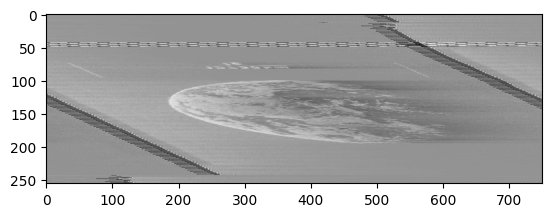

In [79]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2200
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
offset = samplerate*182 +2300 
for index in range(256):
    window = data[offset+index*window_size+1449:offset+(index+1)*window_size ]
    #window3 = window[1499:2199]
    #print(f"start at {(offset+index*window_size)/samplerate}, end at {(offset+(index+1)*window_size)/samplerate}  ")
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    image_data.append(-0.5*x[0:len(window)])
plt.imshow(image_data,cmap="gray")
plt.show()